In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math

## We'll ignore the warnings xgboost gives us
import warnings
warnings.filterwarnings('ignore') 

In [8]:
import xgboost as xgb

In [10]:
### Read data
wells = pd.read_csv("Wells.csv")

## Train-test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(wells, test_size=0.1, random_state=9)

### Separate the outcome and predictors
train_y = (train['switch'] == 'yes').astype(int)
train_X = train.drop(['switch', 'association'], axis="columns")

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([
    ('model', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), 
                                 n_estimators=100, learning_rate=1.2))
])

params = {'model__estimator': [DecisionTreeClassifier(max_depth=2),
                              DecisionTreeClassifier(max_depth=3),
                              DecisionTreeClassifier(max_depth=4)],
         'model__learning_rate' : [0.1, 0.2, 0.3]
        }

grid = GridSearchCV(
    pipe, params, cv = 5, scoring = 'accuracy').fit(train_X, train_y)
print(grid.best_estimator_)
grid.best_score_

Pipeline(steps=[('model',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                                    learning_rate=0.1, n_estimators=100))])


0.6350131350882895

optimal learning rate: 0,1, max_depth = 2, corresponding accuracy = 0.6350131350882895

In [41]:
# 2-a
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
gb_mod = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth = 1)
importance = gb_mod.fit(train_X, train_y).feature_importances_
importance

array([0.57336548, 0.30655674, 0.12007778])

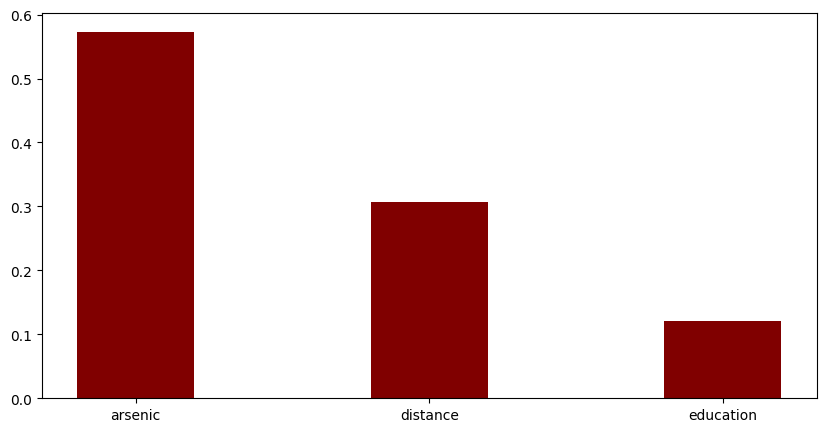

In [36]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(train_X.columns, importance, color ='maroon',
        width = 0.4)
 
# plt.xlabel("Courses offered")
# plt.ylabel("No. of students enrolled")
# plt.title("Students enrolled in different courses")
plt.show()

In [40]:
gb_mod = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth = 1, max_features = 1)
importance = gb_mod.fit(train_X, train_y).feature_importances_
print(importance)

[0.57425813 0.29045022 0.13529165]


while there is a slight increase in importance for arsenic and education, the importance of distance decreased. When we set max_features to be 1, we are forcing every feature to participate in the model. 

In [42]:
# 2c

pipe = Pipeline([
    ('model', None)
])

params = {'model': [GradientBoostingClassifier(n_estimators=100, learning_rate=0.1), # sample neither
                   GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample = 1, max_features = 1), # sample features
                   GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample = 0.5), # sample observations
                   GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample = 0.5, max_features = 1)], # sample both
        }

grid = GridSearchCV(
    pipe, params, cv = 5, scoring = 'accuracy').fit(train_X, train_y)
print(grid.best_estimator_)
grid.best_score_

Pipeline(steps=[('model', GradientBoostingClassifier())])


0.6361235239952334